In [77]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests as req
import pandas as pd

In [78]:
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
units = "imperial"


In [79]:
# Import the census data into a pandas DataFrame

cities = pd.read_csv("worldcities.csv")

# Preview the data
cities.head()

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000
2,ad,encamp,42.533333,1.583333
3,ad,la massana,42.550000,1.516667
4,ad,les escaldes,42.500000,1.533333


In [80]:
#take a sample of cities 
selected_cities = cities.sample(n=500)
selected_cities.head()

,Country,City,Latitude,Longitude
37617,ru,peskovka,59.044781,52.360571
32182,ro,baia,44.716667,28.666667
15646,hu,janossomorja,47.786207,17.136033
17346,in,burla,21.500000,83.866667
5631,cl,bulnes,-36.733333,-72.300000


In [81]:
selected_cities["Temperature"] = ""
selected_cities["Humidity"] = ""
selected_cities["Cloudiness"] = ""
selected_cities["Wind Speed"] = ""
row_count = 0

for index, row in selected_cities.iterrows():
    
    # Create endpoint URL
    target_url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s" % (api_key, row["City"])
    
    #THIS IS WHERE THE ERROR IS, SOMETHING WITH THE URL IS WRONG
    
    # Print log to ensure loop is working correctly
    #print("Now retrieving city # " + str(row_count))
    #print(target_url)
    #row_count += 1
    
    w_city = req.get(target_url).json()
    
    try: 
        city_temp = w_city["main"]["temp"]
        city_hum = w_city["main"]["humidity"]
        city_clouds = w_city["clouds"]["all"]
        city_wind = w_city["wind"]["speed"]
        
        selected_cities.set_value(index, "Temperature", city_temp)
        selected_cities.set_value(index, "Humidity", city_hum)
        selected_cities.set_value(index, "Cloudiness", city_clouds)
        selected_cities.set_value(index, "Wind Speed", city_wind)
    except:
        continue
selected_cities.head()

,Country,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
37617,ru,peskovka,59.044781,52.360571,264.913,78,64,1.28
32182,ro,baia,44.716667,28.666667,282.15,76,0,4.1
15646,hu,janossomorja,47.786207,17.136033,284.88,76,0,2.1
17346,in,burla,21.500000,83.866667,299.013,83,0,1.83
5631,cl,bulnes,-36.733333,-72.300000,287,72,0,4.1


In [82]:
selected_cities.to_csv("citytemp_data.csv", encoding="utf-8", index=False)

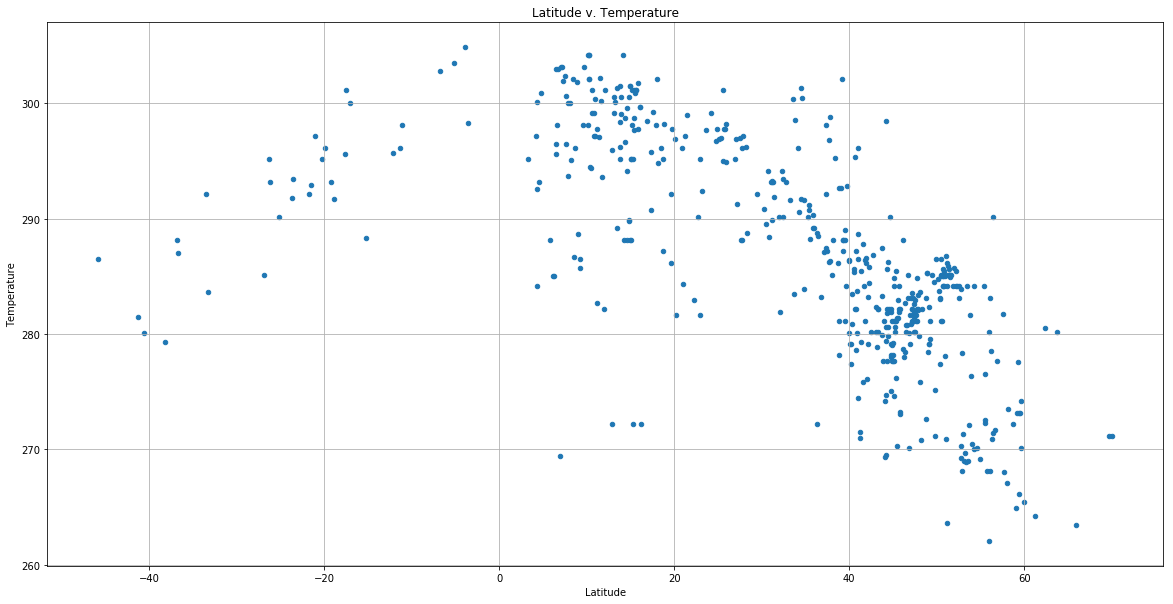

In [83]:
selected_cities['Temperature'] = pd.to_numeric(selected_cities['Temperature'])
selected_cities['Humidity'] = pd.to_numeric(selected_cities['Humidity'])
selected_cities.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(20,10),
              title="Latitude v. Temperature")
plt.show()


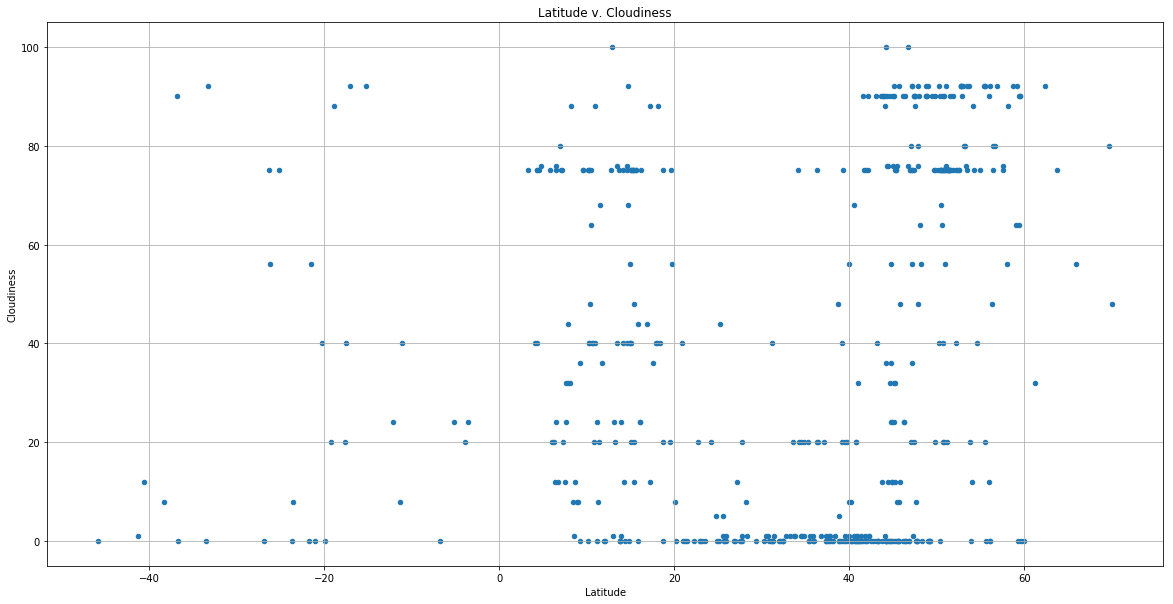

In [84]:
selected_cities['Cloudiness'] = pd.to_numeric(selected_cities['Cloudiness'])
selected_cities.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(20,10),
              title="Latitude v. Cloudiness")
plt.show()


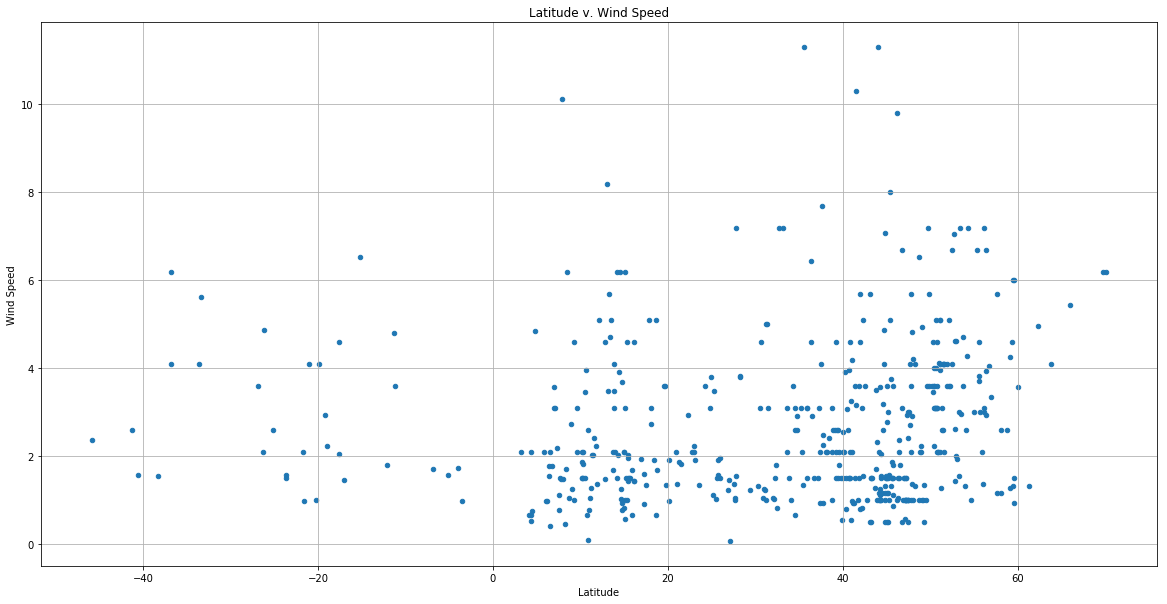

In [85]:
selected_cities['Wind Speed'] = pd.to_numeric(selected_cities['Wind Speed'])
selected_cities.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(20,10),
              title="Latitude v. Wind Speed")
plt.show()


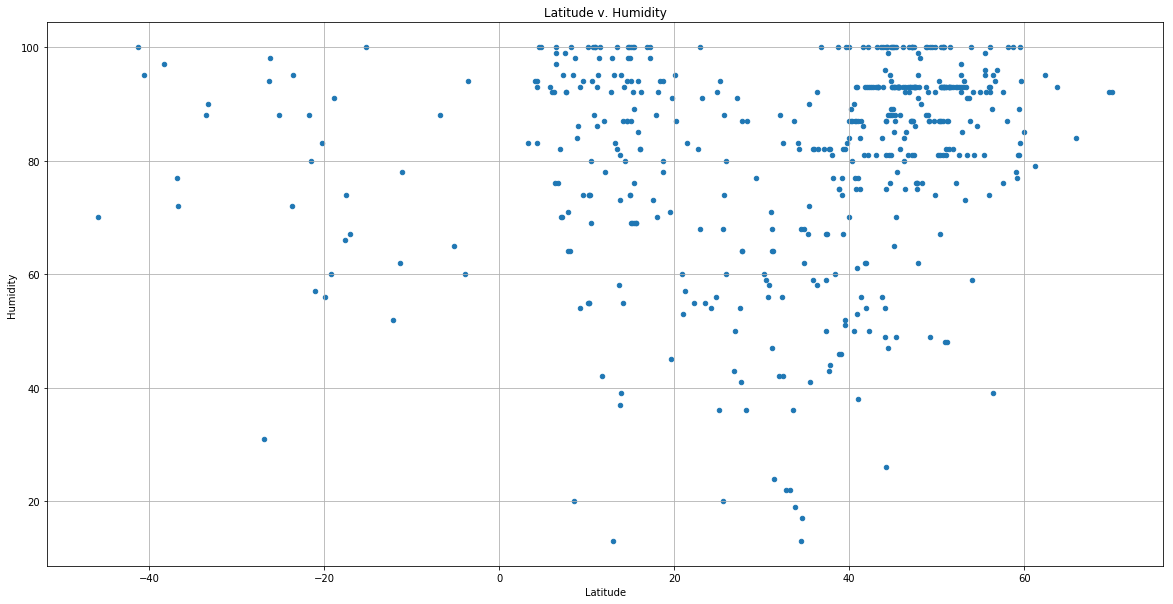

In [86]:
selected_cities.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(20,10),
              title="Latitude v. Humidity")
plt.show()